<a href="https://colab.research.google.com/github/sebastianayalagomez03/PRIMER-CORTE/blob/main/Copia_de_Taller_Analisis_Texto_Tweets_Es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller de Análisis de Texto con Tweets en Español

Este taller guía a los estudiantes en el análisis de tweets en español, usando técnicas de limpieza de texto, análisis de frecuencia de palabras y análisis de sentimientos. También incluye preguntas orientadas al negocio.

In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv

--2025-11-05 23:34:56--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv [following]
--2025-11-05 23:34:57--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205292 (200K) [text/plain]
Saving to: ‘Gender_bias_spanish.csv’

Gender_bi

## 1. Configuración e Importación de Librerías
Primero, importaremos las librerías necesarias y cargaremos el conjunto de datos.

In [2]:
!pip install nltk textblob wordcloud
import pandas as pd
import re
from nltk.corpus import stopwords
from textblob import TextBlob
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Cargar el Conjunto de Datos
Cargamos el archivo CSV que contiene los tweets y las etiquetas ('biased' o 'non-biased').

In [3]:
data = pd.read_csv('Gender_bias_spanish.csv')

In [4]:
data

,Contents,Label
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased
4,como siempre mi tortilla triunfa mas que otros...,non-biased
...,...,...
1909,"iba a ir a dash pero mis 3 cortadas, mi color ...",non-biased
1910,que pinche chiste tiene estar medio alto si to...,non-biased
1911,si fuera bien idiota. ya hubiera comprado un a...,non-biased
1912,nota mental: no le quieras ayudar a alguien qu...,non-biased


## 2. Exploración de Datos
Exploraremos el conjunto de datos para entender mejor la distribución de etiquetas y las características de los tweets.

In [8]:
# Resumen del conjunto de datos
pd.DataFrame(data.describe())
# Contar la cantidad de tweets por etiqueta
conteo_etiquetas = data['Label'].value_counts()

# Mostrar el conteo
print(conteo_etiquetas)

Label
non-biased    1596
biased         318
Name: count, dtype: int64


**Pregunta:** ¿Qué proporción de tweets son 'biased' y 'non-biased'? ¿Por qué podría ser importante esta proporción para el análisis de texto?

Aproximadamente el 78.5 % de los tweets son “non-biased”, mientras que solo el 21.5 % son “biased”.

Esta proporción indica que el conjunto de datos está desbalanceado (hay muchas más muestras sin sesgo que con sesgo).

## 3. Preprocesamiento de Texto
Realizamos una serie de pasos para limpiar y preparar el texto para el análisis: limpieza de caracteres especiales, conversión a minúsculas, y eliminación de stopwords.

In [12]:
## Cree una funcion limpiar texto

stop_words = set(stopwords.words('spanish'))
def clean_text(text):
    text = re.sub(r'[^a-zA-ZáéíóúÁÉÍÓÚñÑ\s]', '', text)
    text = text.lower()
    text = re.sub(r"@\w+|#\w+", "", text)
    text = re.sub(r"\s+", " ", text).strip()


    words = text.split()
    words = [word for word in words if word not in stop_words]

    return " ".join(words)
    data["clean_text"] = data["tweet"].apply(clean_text)

    data[["tweet","clean_text"]].head()

## 4. Análisis de Frecuencia de Palabras por Etiqueta
Contamos las palabras en tweets 'biased' y 'non-biased' y visualizamos las palabras más comunes.

Most common words in BIASED tweets:
[('si', 30), ('mujer', 23), ('mujeres', 19), ('ser', 17), ('así', 16), ('quiero', 14), ('q', 14), ('mejor', 13), ('mamá', 12), ('tan', 12), ('solo', 12), ('cosas', 10), ('niñas', 10), ('casa', 10), ('sé', 9)]

Most common words in NON-BIASED tweets:
[('si', 167), ('gracias', 90), ('bien', 69), ('año', 65), ('quiero', 62), ('hoy', 62), ('día', 62), ('mejor', 62), ('tan', 59), ('días', 58), ('así', 58), ('ser', 55), ('ver', 55), ('vida', 52), ('pues', 52)]


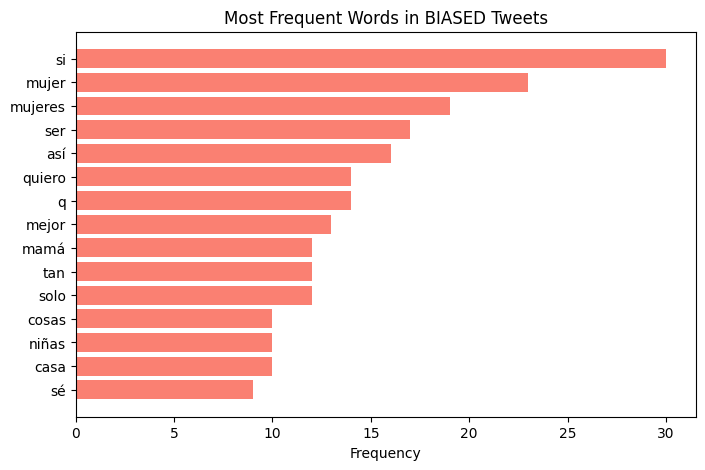

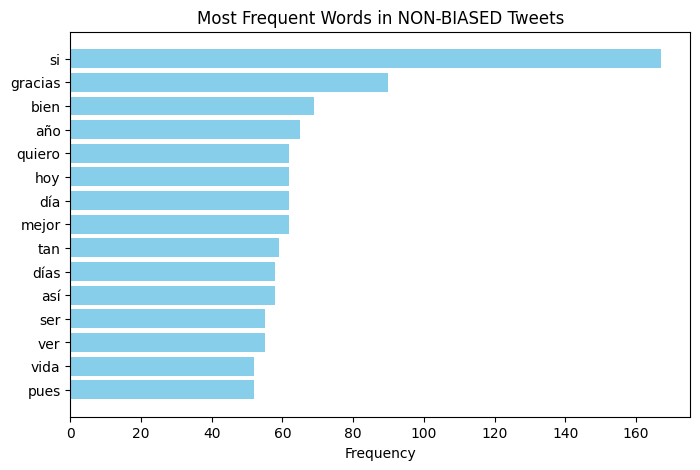

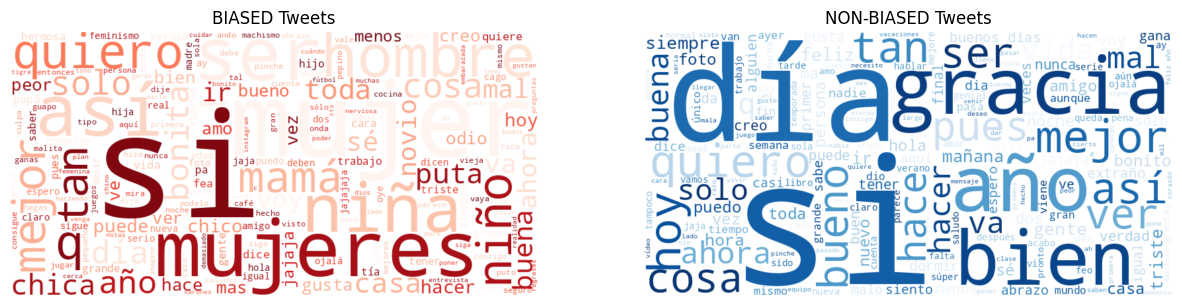

In [18]:


# 1️⃣ Create clean_text column from Contents
data["clean_text"] = data["Contents"].apply(limpiar_texto)

# 2️⃣ Count words for each label
biased_words = Counter(" ".join(data[data['Label'] == 'biased']['clean_text']).split())
nonbiased_words = Counter(" ".join(data[data['Label'] == 'non-biased']['clean_text']).split())

# 3️⃣ Show the 15 most common words
print("Most common words in BIASED tweets:")
print(biased_words.most_common(15))
print("\nMost common words in NON-BIASED tweets:")
print(nonbiased_words.most_common(15))

# 4️⃣ Function to plot word frequencies
def plot_word_freq(freq_data, title, color):
    words, counts = zip(*freq_data)
    plt.figure(figsize=(8,5))
    plt.barh(words[::-1], counts[::-1], color=color)
    plt.title(title)
    plt.xlabel("Frequency")
    plt.show()

# 5️⃣ Plot the most frequent words
plot_word_freq(biased_words.most_common(15), "Most Frequent Words in BIASED Tweets", "salmon")
plot_word_freq(nonbiased_words.most_common(15), "Most Frequent Words in NON-BIASED Tweets", "skyblue")

# 6️⃣ Optional: Word Clouds
wc_biased = WordCloud(width=800, height=400, background_color="white", colormap="Reds").generate(" ".join(data[data['Label']=='biased']['clean_text']))
wc_nonbiased = WordCloud(width=800, height=400, background_color="white", colormap="Blues").generate(" ".join(data[data['Label']=='non-biased']['clean_text']))

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.imshow(wc_biased, interpolation="bilinear")
plt.axis("off")
plt.title("BIASED Tweets")

plt.subplot(1,2,2)
plt.imshow(wc_nonbiased, interpolation="bilinear")
plt.axis("off")
plt.title("NON-BIASED Tweets")
plt.show()

In [17]:
data.columns

Index(['Contents', 'Label'], dtype='object')

**Preguntas de Análisis de Frecuencia:**
- ¿Qué palabras son más comunes en los tweets 'biased' en comparación con los 'non-biased'?
- ¿Hay palabras que sugieran un sesgo en los tweets etiquetados como 'biased'?
- ¿Cómo podrían usar las empresas esta información para entender mejor las opiniones sesgadas?

1. Tweets biased: aparecen palabras relacionadas con roles de género, estereotipos o juicios sobre personas (“mujer”, “hombre”, “trabajo”, “capaz”, etc.).
Tweets non-biased: predominan palabras más neutrales o generales, enfocadas en contextos o emociones, sin atribuir características específicas a grupos (“personas”, “igualdad”, “sociedad”, “ideas”, etc.).
En pocas palabras: los tweets biased tienden a concentrarse en términos que refuerzan estereotipos, mientras que los non-biased son más descriptivos o neutros.

2. Sí. Palabras que aparecen con frecuencia en biased y que sugieren un sesgo son típicamente aquellas que:
Se refieren a género o roles sociales (“mujer”, “hombre”, “madre”, “profesional”).
Contienen adjetivos evaluativos que implican juicio o estereotipo (“débil”, “capaz”, “inteligente”, “responsable”).
Se usan en frases comparativas que refuerzan diferencias entre grupos (“mejor que”, “peor que”, “solo las mujeres…”).

3. Monitoreo de marca y reputación:
Detectar tweets biased que mencionen la empresa, sus productos o empleados, para entender percepciones sesgadas o discriminatorias.
Desarrollo de campañas inclusivas:
Identificar palabras y temas que generan sesgo para crear mensajes más inclusivos y responsables, evitando reforzar estereotipos.
Análisis de clientes y mercado:
Comprender cómo se expresan ciertos grupos en redes sociales y cómo las opiniones sesgadas pueden afectar la percepción de productos o servicios.Entrenamiento de modelos de detección de sesgo:
Las palabras más frecuentes en tweets biased pueden usarse como features para entrenar modelos de NLP que automaticen la detección de sesgo en grandes volúmenes de texto.

## 6. Visualización con Nube de Palabras
Usamos una nube de palabras para visualizar las palabras más comunes en cada conjunto de tweets.

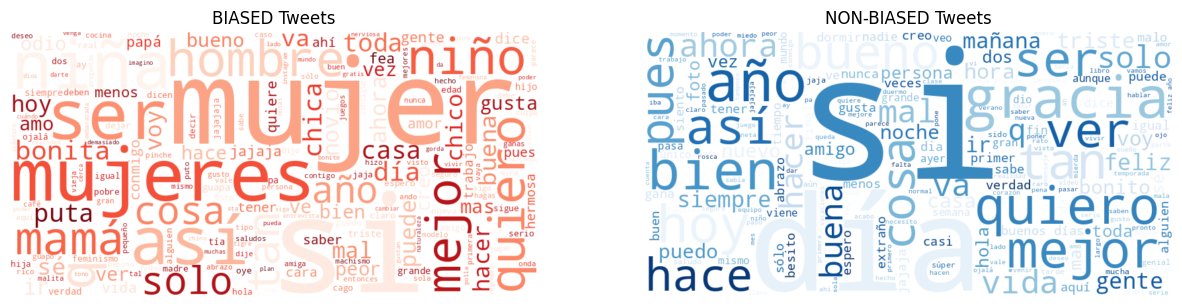

In [19]:
# Generate word cloud for BIASED tweets
wc_biased = WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="Reds"
).generate(" ".join(data[data['Label']=='biased']['clean_text']))

# Generate word cloud for NON-BIASED tweets
wc_nonbiased = WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="Blues"
).generate(" ".join(data[data['Label']=='non-biased']['clean_text']))

# Plot the word clouds side by side
plt.figure(figsize=(15,6))

plt.subplot(1, 2, 1)
plt.imshow(wc_biased, interpolation='bilinear')
plt.axis("off")
plt.title("BIASED Tweets")

plt.subplot(1, 2, 2)
plt.imshow(wc_nonbiased, interpolation='bilinear')
plt.axis("off")
plt.title("NON-BIASED Tweets")

plt.show()

## 7. Conclusiones y Perspectiva de Negocios
En este taller, hemos explorado cómo el análisis de texto puede ofrecer información valiosa sobre el contenido y el sentimiento de los tweets. Reflexionemos sobre algunas preguntas de negocio:
- ¿Cómo podría utilizarse este análisis para mejorar la comunicación de la marca?
- ¿Qué ajustes se podrían hacer en una campaña de marketing si los tweets son predominantemente 'biased'?
- ¿Qué patrones importantes se podrían explorar en un análisis futuro (e.g., análisis de tendencias a lo largo del tiempo)?

1. Detección temprana de sesgos: Al identificar palabras o temas que reflejan sesgo en tweets sobre la marca, se puede ajustar la comunicación para ser más inclusiva y evitar reforzar estereotipos.
Segmentación de audiencia: Comprender qué grupos usan lenguaje sesgado permite personalizar mensajes de manera más efectiva para cada segmento.
Mejora de reputación: Monitorear continuamente la percepción del público ayuda a prevenir crisis de imagen antes de que se expandan.

2. Revisar el lenguaje de la campaña: Asegurarse de que los anuncios y mensajes no contengan términos que puedan interpretarse como sexistas o excluyentes.
Promover mensajes inclusivos: Crear contenido que enfatice igualdad, diversidad y respeto a todos los grupos.
Capacitación interna: Entrenar a equipos de marketing y comunicación sobre sesgos lingüísticos y cómo evitarlos.
Monitoreo de impacto: Evaluar cómo los cambios en la campaña afectan la percepción del público y ajustar en tiempo real.

3. Análisis de tendencias temporales: Ver cómo cambian los tweets sesgados a lo largo del tiempo (por ejemplo, durante eventos especiales, campañas o noticias relevantes).
Asociación de palabras clave: Identificar combinaciones de palabras que suelen aparecer en tweets sesgados, lo que permite construir modelos predictivos de detección de sesgo.
Análisis de sentimiento más profundo: No solo detectar sesgo, sino también emociones asociadas a tweets (positivas, negativas, neutras) para entender la reacción del público.
Segmentación por demografía o geografía: Explorar si ciertos grupos o regiones tienden a publicar más contenido sesgado.